Dataset used in this project / notebook can be found on Kaggle webiste (https://www.kaggle.com/c/titanic/data).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
titanic_dataset = pd.read_csv("titanic.csv")

In [3]:
titanic_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Preprocessing

    1. Create new dataframe with columns that will determine clusters
    2. Encode Sex colum to 0 and 1
    3. Use PCA for dimensionality reduction, so we can plot datapoints easily
    

### Creating new dataframe

In [4]:
set_to_use = titanic_dataset
set_to_use = set_to_use.drop('Name', axis=1)
set_to_use = set_to_use.drop('Ticket', axis=1)
set_to_use = set_to_use.drop('Fare', axis=1)
set_to_use = set_to_use.drop('Embarked', axis=1)
set_to_use.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
0,1,0,3,male,22.0,1,0,NaN
1,2,1,1,female,38.0,1,0,C85
2,3,1,3,female,26.0,0,0,NaN
3,4,1,1,female,35.0,1,0,C123
4,5,0,3,male,35.0,0,0,NaN


In [5]:
set_to_use.fillna(0, inplace=True)

In [6]:
set_to_use.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
0,1,0,3,male,22.0,1,0,0
1,2,1,1,female,38.0,1,0,C85
2,3,1,3,female,26.0,0,0,0
3,4,1,1,female,35.0,1,0,C123
4,5,0,3,male,35.0,0,0,0


### Encoding Sex column using LabelEncoder

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encoder = LabelEncoder()
encoded_sex = encoder.fit_transform(set_to_use.iloc[:, 3])

In [9]:
set_to_use['Sex'] = encoded_sex

In [10]:
set_to_use.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
0,1,0,3,1,22.0,1,0,0
1,2,1,1,0,38.0,1,0,C85
2,3,1,3,0,26.0,0,0,0
3,4,1,1,0,35.0,1,0,C123
4,5,0,3,1,35.0,0,0,0


In [11]:
features = set_to_use.iloc[:, 1:-1].values

In [12]:
print(features)

[[  0.   3.   1.  22.   1.   0.]
 [  1.   1.   0.  38.   1.   0.]
 [  1.   3.   0.  26.   0.   0.]
 ..., 
 [  0.   3.   0.   0.   1.   2.]
 [  1.   1.   1.  26.   0.   0.]
 [  0.   3.   1.  32.   0.   0.]]


### Using Principal Component Analysis for dimensionality reduction

In [13]:
from sklearn.decomposition import PCA

In [14]:
titanic_pca = PCA(n_components=4)
titanic_pca.fit(features)
test = titanic_pca.transform(features)

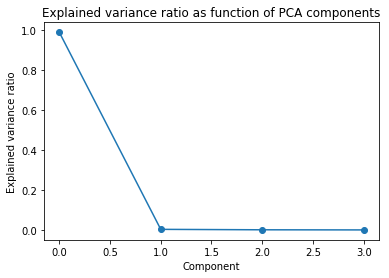

In [15]:
plt.plot(list(titanic_pca.explained_variance_ratio_),'-o')
plt.title('Explained variance ratio as function of PCA components')
plt.ylabel('Explained variance ratio')
plt.xlabel('Component')
plt.show()

This PCA above with 4 components was for testing. We will need 2 components for 2D plotting, also for every clustering algorithm, we are going to use reduced_features with 2 features.

In [16]:
reduction_pca = PCA(n_components=2)
reduced_features = reduction_pca.fit_transform(features)

## Clustering

Firstly we are going to use SKlearn version of KMeans

In [17]:
from sklearn.cluster import KMeans

Starting with version of 5 clusters.

In [18]:
km = KMeans(n_clusters=5)
clusters = km.fit(reduced_features)

In [19]:
clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

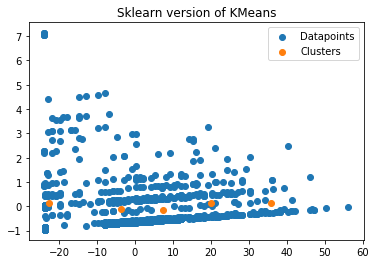

In [20]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], label='Datapoints')
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], label='Clusters')
plt.title("Sklearn version of KMeans")
plt.legend()
plt.show()

In [21]:
reduced_features.shape

(891, 2)

In [22]:
clusters.cluster_centers_

array([[-22.6707669 ,   0.13760433],
       [  7.26957844,  -0.16324169],
       [ 35.87681137,   0.13957946],
       [ -3.55585101,  -0.10161391],
       [ 20.04395507,   0.15032982]])

### (Optional) Using custom KMeans

In [23]:
from kmeans_numpy import *

In [24]:
kmm = KMeans_numpy(n_clusters=5, tolerance=0.00001)

In [25]:
clusters, clustered_data = kmm.fit(reduced_features)

In [26]:
clusters = np.array(clusters)

I have improved this version of KMeans so we can easily plot datapoints in clusters and to inspect that data.

In [27]:
cluster_one_data = np.array(clustered_data[0])
cluster_two_data = np.array(clustered_data[1])
cluster_three_data = np.array(clustered_data[2])
cluster_four_data = np.array(clustered_data[3])
cluster_five_data = np.array(clustered_data[4])

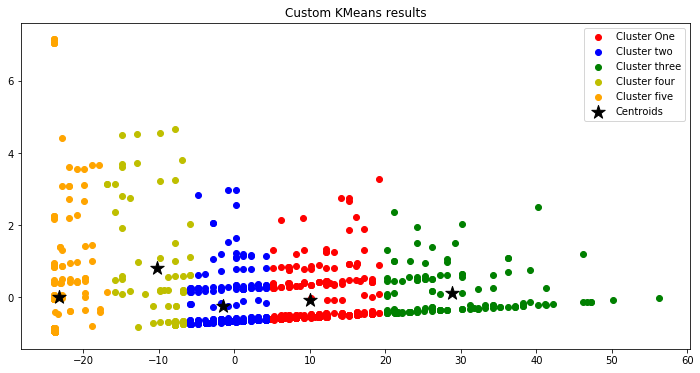

In [28]:
plt.figure(figsize=(12, 6))
plt.scatter(cluster_one_data[:, 0], cluster_one_data[:, 1], c='r', label='Cluster One')
plt.scatter(cluster_two_data[:, 0], cluster_two_data[:, 1], c='b', label='Cluster two')
plt.scatter(cluster_three_data[:, 0], cluster_three_data[:, 1], c='g', label='Cluster three')
plt.scatter(cluster_four_data[:, 0], cluster_four_data[:, 1], c='y', label='Cluster four')
plt.scatter(cluster_five_data[:, 0], cluster_five_data[:, 1], color='orange', label='Cluster five')
plt.scatter(clusters[:, 0], clusters[:, 1], marker='*', s=200, color='black', label='Centroids')
plt.title("Custom KMeans results")
plt.legend()
plt.show()

Let's experiment and see how custom KMeans is working with less numbers of clusters. In this way we can determine optimal number of clusters.

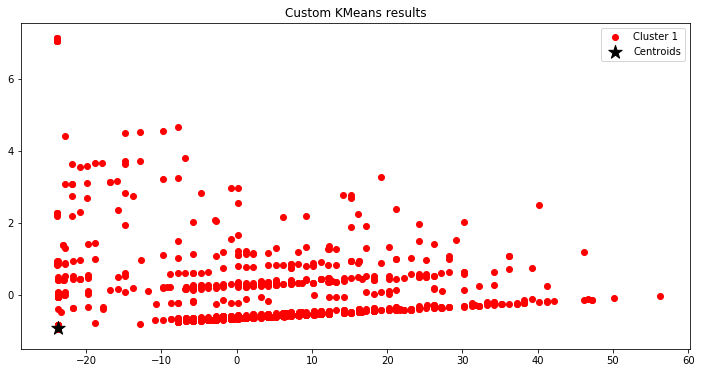

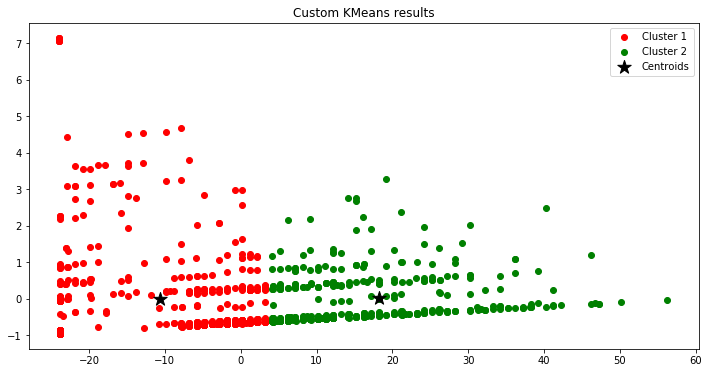

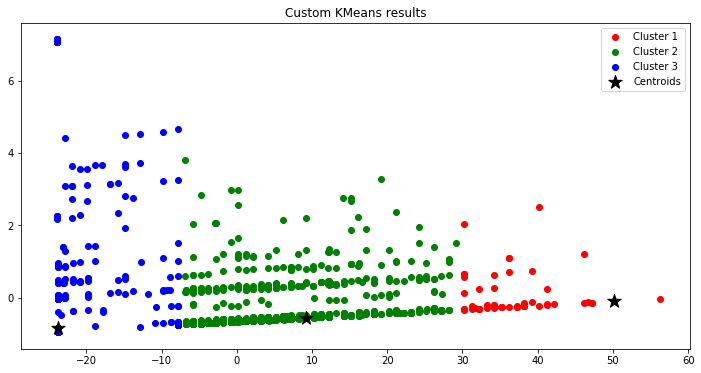

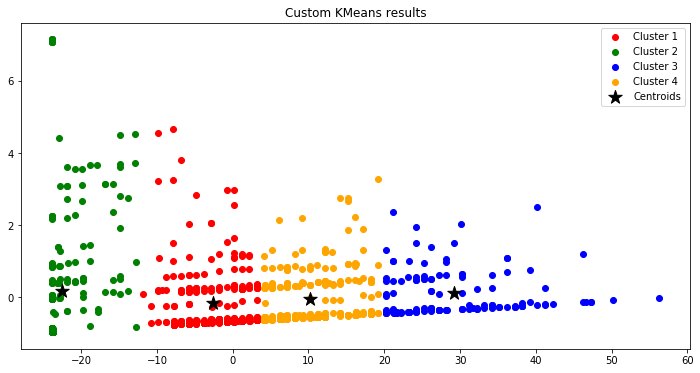

This experiment took: 5.075361728668213 seconds with custom algorithm


In [29]:
import time

plot_colors = ['red', 'green', 'blue', 'orange', 'yellow']
start = time.time()
for i in range(1, 5):
    test = KMeans_numpy(n_clusters=i, tolerance=0.00001)
    clust, clust_data = test.fit(reduced_features)
    clust = np.array(clust)
    plt.figure(figsize=(12, 6))
    for key in clust_data.keys():
        plt.scatter(np.array(clust_data[key])[:, 0], np.array(clust_data[key])[:, 1], color=plot_colors[key], label='Cluster {}'.format(key+1))
    
    plt.scatter(clust[:, 0], clust[:, 1], marker='*', s=200, color='black', label='Centroids')
    plt.title("Custom KMeans results")
    plt.legend()
    plt.show()
    
end = time.time()
print("This experiment took: {} seconds with custom algorithm".format(end-start))